<a href="https://colab.research.google.com/github/rahuljungbahadur/hands_on_ml_book/blob/main/autoencoder_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

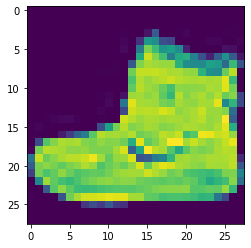

In [6]:
plt.imshow(X_train[0])

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train = X_train/255 ## Scaling it to 0 & 1

In [25]:
model = Sequential()

model.add(Flatten(input_shape=[28,28]))

model.add(Dense(units=500, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=2, activation='relu'))

## Decoder
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=500, activation='relu'))
model.add(Dense(units=(28*28), activation='sigmoid'))

## Reshaping
model.add(Reshape(target_shape=[28,28]))

model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_55 (Dense)            (None, 500)               392500    
                                                                 
 dense_56 (Dense)            (None, 100)               50100     
                                                                 
 dense_57 (Dense)            (None, 50)                5050      
                                                                 
 dense_58 (Dense)            (None, 2)                 102       
                                                                 
 dense_59 (Dense)            (None, 50)                150       
                                                                 
 dense_60 (Dense)            (None, 100)              

In [27]:
model.fit(x=X_train, y=X_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 45s 22ms/step - loss: 0.3527 - accuracy: 0.0808
Epoch 2/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3293 - accuracy: 0.0967
Epoch 3/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3254 - accuracy: 0.1078
Epoch 4/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3231 - accuracy: 0.1163
Epoch 5/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3215 - accuracy: 0.1184


In [33]:
encoder_model = Sequential(model.layers[:5])

In [35]:
X_train[0].shape

(28, 28)

In [38]:
output = encoder_model.predict(X_train[:1000])

In [39]:
import seaborn as sns

In [41]:
output.shape

(1000, 2)

In [49]:
pdf_clustered = pd.DataFrame(output, columns = ['x1', 'x2'])

In [50]:
pdf_clustered['y_val'] = y_train[:1000].astype(str)

In [51]:
pdf_clustered

,x1,x2,y_val
0,4.173638,0.201088,9
1,6.556414,11.929468,0
2,5.663191,6.332819,0
3,4.991687,7.168577,3
4,11.595124,13.580891,0
...,...,...,...
995,5.236145,2.504862,7
996,8.745876,12.806583,3
997,3.552237,4.392987,3
998,4.629232,0.334367,9


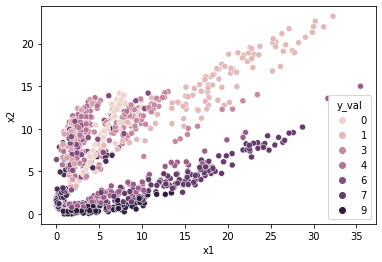

In [46]:
sns.scatterplot(x='x1', y='x2', data=pdf_clustered, hue='y_val')

In [52]:
# load an example dataset

data = pdf_clustered
# plot the dataset, referencing dataframe column names
import altair as alt
alt.Chart(data).mark_point().encode(
  x='x1',
  y='x2',
  color='y_val'
).interactive()

alt.Chart(...)

In [53]:
help(fashion_mnist.load_data)

Help on function load_data in module keras.datasets.fashion_mnist:

load_data()
    Loads the Fashion-MNIST dataset.
    
    This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
    along with a test set of 10,000 images. This dataset can be used as
    a drop-in replacement for MNIST.
    
    The classes are:
    
    | Label | Description |
    |:-----:|-------------|
    |   0   | T-shirt/top |
    |   1   | Trouser     |
    |   2   | Pullover    |
    |   3   | Dress       |
    |   4   | Coat        |
    |   5   | Sandal      |
    |   6   | Shirt       |
    |   7   | Sneaker     |
    |   8   | Bag         |
    |   9   | Ankle boot  |
    
    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **x_train**: uint8 NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data.
    
    **y_train**: uint8 NumPy array of labels (integers in range 0-9)
      with shape `(60000,)` f

In [8]:
X_train_3 = X_train[np.isin(y_train, [0,1,5])]

In [73]:
model2_encoder = Sequential()

model2_encoder.add(Flatten(input_shape=[28,28]))

model2_encoder.add(Dense(units=500, activation='selu'))
model2_encoder.add(Dense(units=250, activation='selu'))
model2_encoder.add(Dense(units=100, activation='selu'))
model2_encoder.add(Dense(units=50, activation='selu'))
model2_encoder.add(Dense(units=25, activation='selu'))

## Decoder

model2_decoder = Sequential()
model2_decoder.add(Dense(units=50, activation='selu'))
model2_decoder.add(Dense(units=100, activation='selu'))
model2_encoder.add(Dense(units=250, activation='selu'))
model2_decoder.add(Dense(units=500, activation='selu'))
model2_decoder.add(Dense(units=(28*28), activation='sigmoid'))

## Reshaping
model2_decoder.add(Reshape(target_shape=[28,28]))



In [74]:
from tensorflow.keras.optimizers import SGD

In [75]:
model2_ae=Sequential([model2_encoder, model2_decoder])
model2_ae.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=1.5))

In [76]:
model2_ae.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 250)               555675    
                                                                 
 sequential_10 (Sequential)  (None, 28, 28)            460934    
                                                                 
Total params: 1,016,609
Trainable params: 1,016,609
Non-trainable params: 0
_________________________________________________________________


In [19]:
X_test = X_test/255

In [39]:
X_test_3 = X_test[np.isin(y_test, [0,1,5])]

In [77]:
model2_ae.fit(X_train_3, X_train_3, epochs=15, validation_data=[X_test_3, X_test_3])

Epoch 1/15
563/563 [==============================] - 9s 16ms/step - loss: 0.3205 - val_loss: 0.0780
Epoch 2/15
563/563 [==============================] - 8s 15ms/step - loss: 0.2804 - val_loss: 0.0479
Epoch 3/15
563/563 [==============================] - 8s 15ms/step - loss: 0.2714 - val_loss: 0.0366
Epoch 4/15
563/563 [==============================] - 8s 15ms/step - loss: 0.2641 - val_loss: 0.0468
Epoch 5/15
563/563 [==============================] - 8s 15ms/step - loss: 0.2600 - val_loss: 0.0352
Epoch 6/15
563/563 [==============================] - 9s 15ms/step - loss: 0.2567 - val_loss: 0.0339
Epoch 7/15
563/563 [==============================] - 8s 15ms/step - loss: 0.2542 - val_loss: 0.0313
Epoch 8/15
563/563 [==============================] - 8s 15ms/step - loss: 0.2517 - val_loss: 0.0287
Epoch 9/15
563/563 [==============================] - 9s 15ms/step - loss: 0.2502 - val_loss: 0.0271
Epoch 10/15
563/563 [==============================] - 9s 15ms/step - loss: 0.2483 - val_lo

In [78]:
model2_softmax = model2_ae.layers[0]

In [79]:
model2_softmax.add(Dense(units=3, activation='softmax'))

In [80]:
model2_softmax.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 500)               392500    
                                                                 
 dense_27 (Dense)            (None, 250)               125250    
                                                                 
 dense_28 (Dense)            (None, 100)               25100     
                                                                 
 dense_29 (Dense)            (None, 50)                5050      
                                                                 
 dense_30 (Dense)            (None, 25)                1275      
                                                                 
 dense_33 (Dense)            (None, 250)              

In [94]:
model2_softmax_predicted = model2_softmax.predict(X_train_3)

In [95]:
model_outputs = np.argmax(model2_softmax_predicted, axis=1)
# model_outputs

In [96]:
y_train_2 = y_train[np.isin(y_train, [0,1,5])]

In [97]:
test_results = pd.DataFrame(zip(model_outputs, y_train_2), columns=['predicted', 'original'])

In [93]:
test_results

,predicted,original
0,0,0
1,2,0
2,0,0
3,2,5
4,1,5
5,2,0
6,2,5
7,2,5
8,2,1
9,0,0


In [98]:
output_df = test_results.groupby(['predicted', 'original']).aggregate(len)

In [67]:
import seaborn as sns

In [99]:
pd.DataFrame(output_df)

0
predicted original      
0         0         2424
          1         2773
          5          247
1         0         1015
          1         1272
          5         1248
2         0         2561
          1         1955
          5         4505

In [62]:
pd.pivot_table(test_results, values='original', index='predicted', aggfunc=len)

,original
predicted,
0,9
1,10
2,11


In [51]:
from plotnine import *

In [60]:
(test_results
 .groupby(['predicted', 'original'])
 .count()
 )

Empty DataFrame
Columns: []
Index: [(0, 0), (0, 1), (1, 0), (1, 1), (1, 5), (2, 0), (2, 5)]

In [ ]:
(ggplot(test_results, aes(x='predicted'))+
 geom_bar(stat='count')+
 facet_wrap('~'))

In [41]:
model2_encoder_output = model2_encoder.predict(X_train_3[:30])

In [42]:
model2_encoder_output[0]

array([3.8792565e-09, 1.0000000e+00, 1.8187615e-08], dtype=float32)

In [1]:
model2_encoder_output[1]

NameError: ignored

In [45]:
np.argmax(model2_encoder_output, axis=1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [63]:
model2_encoder = Sequential(model2.layers[:5])

In [64]:
model2_clusters = model2_encoder.predict(X_train[:1000])

In [67]:
np.argmax(model2_clusters, axis=1)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [68]:
model3 = Sequential()

model3.add(Flatten(input_shape=[28,28]))

model3.add(Dense(units=500, activation='relu'))
model3.add(Dense(units=100, activation='relu'))
model3.add(Dense(units=50, activation='relu'))
model3.add(Dense(units=10, activation='sigmoid'))

## Decoder
model3.add(Dense(units=50, activation='relu'))
model3.add(Dense(units=100, activation='relu'))
model3.add(Dense(units=500, activation='relu'))
model3.add(Dense(units=(28*28), activation='sigmoid'))

## Reshaping
model3.add(Reshape(target_shape=[28,28]))

model3.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])

In [69]:
model3.fit(X_train, X_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 48s 24ms/step - loss: 0.4921 - accuracy: 0.0454
Epoch 2/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.4908 - accuracy: 0.0450
Epoch 3/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.4906 - accuracy: 0.0448
Epoch 4/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.4906 - accuracy: 0.0446
Epoch 5/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.4905 - accuracy: 0.0449


In [70]:
model3_encoder = Sequential(model3.layers[:5])

In [71]:
model3_encoder_output = model3_encoder.predict(X_train[:1000])

In [72]:
np.argmax(model3_encoder_output,axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,